In [1]:
import importlib
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
import multi_loc.covariance as covariance

In [3]:
%matplotlib notebook

In [4]:
importlib.reload(covariance)

<module 'multi_loc.covariance' from '/Users/harty/Documents/multi_loc/multi_loc/covariance.py'>

In [5]:
dimension = 40
rho0 = 6
rho = np.arange(dimension, dtype=float)
rho = np.minimum(rho, (dimension - rho) % dimension)
P_cov = covariance.make_correlation_matrix(
    rho, rho0, covariance.correlation_sqd_exp)

6
6


<IPython.core.display.Javascript object>


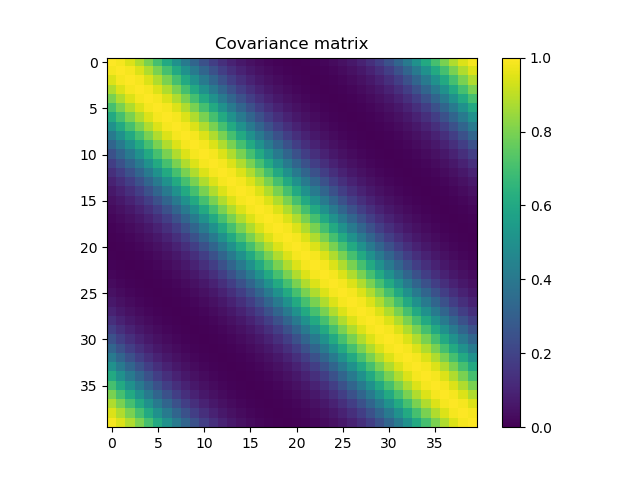

4.154060299050958


In [6]:
plt.figure()
image = plt.imshow(P_cov, vmin=0, vmax=1)
plt.colorbar(image)
plt.title('Covariance matrix')
print(np.log10(np.linalg.cond(P_cov)))

<IPython.core.display.Javascript object>


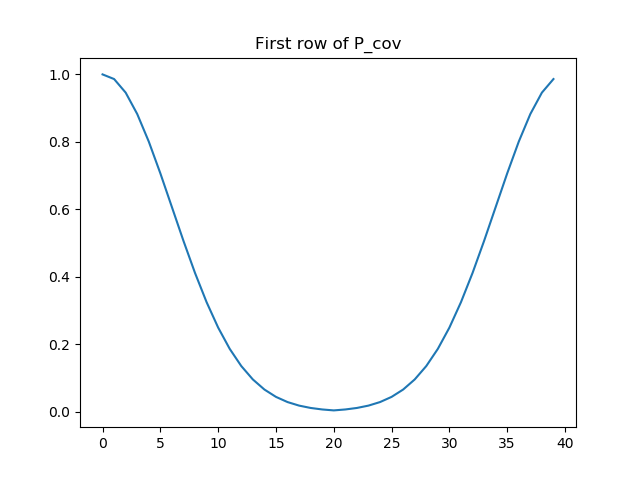

Text(0.5,1,'First row of P_cov')

In [7]:
plt.figure()
plt.plot(P_cov[0,:])
plt.title('First row of P_cov')

In [8]:
eig_val = np.fft.fft(P_cov[0, :])
eig_vec = np.fft.fft(np.eye(dimension))
eig_vec_inv = sp.linalg.inv(eig_vec)

In [9]:
P_hat = eig_vec @ np.diag(eig_val.real) @ eig_vec_inv

<IPython.core.display.Javascript object>


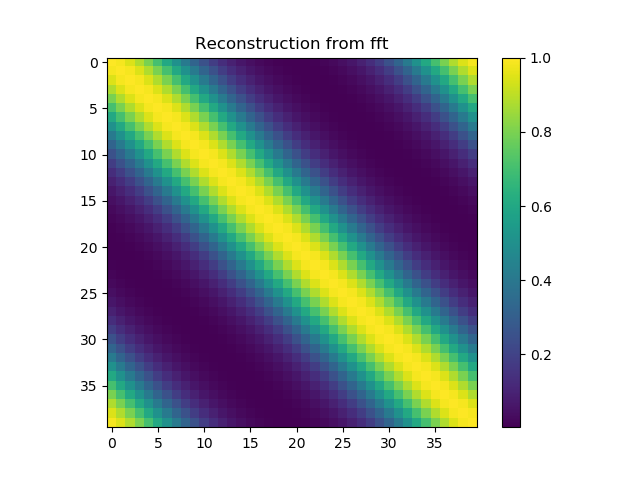

<IPython.core.display.Javascript object>


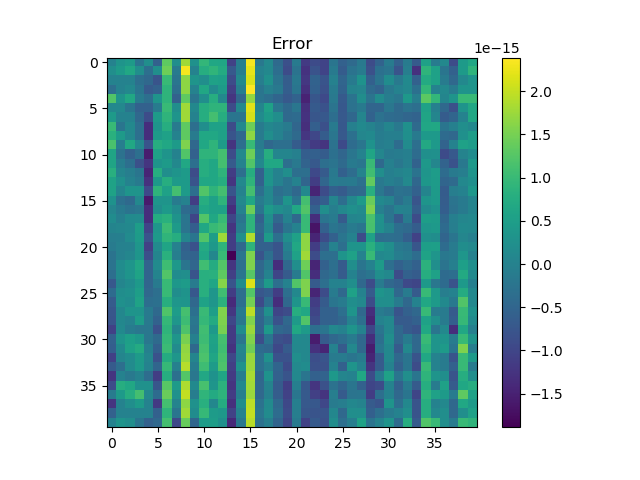

Text(0.5,1,'Error')

In [10]:
plt.figure()
im = plt.imshow(P_hat.real)
plt.colorbar(im)
plt.title('Reconstruction from fft')

plt.figure()
im = plt.imshow(P_hat.real - P_cov)
plt.colorbar(im)
plt.title('Error')

In [11]:
P_sqrt = eig_vec @ np.diag(np.sqrt(eig_val)) @ eig_vec_inv

<IPython.core.display.Javascript object>


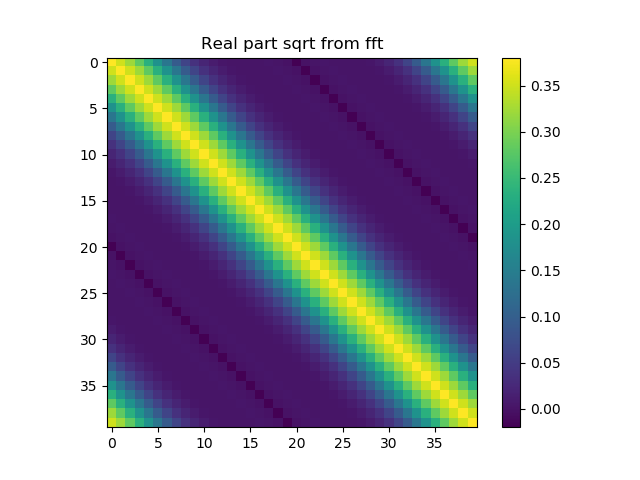

<IPython.core.display.Javascript object>


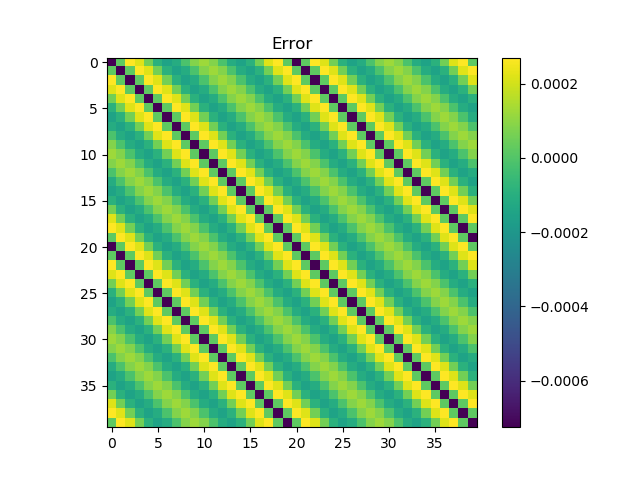

Text(0.5,1,'Error')

In [12]:
plt.figure()
im = plt.imshow(P_sqrt.real)
plt.colorbar(im)
plt.title('Real part sqrt from fft')

plt.figure()
im = plt.imshow(P_cov - (P_sqrt.real @ P_sqrt.real))
plt.colorbar(im)
plt.title('Error')

<IPython.core.display.Javascript object>


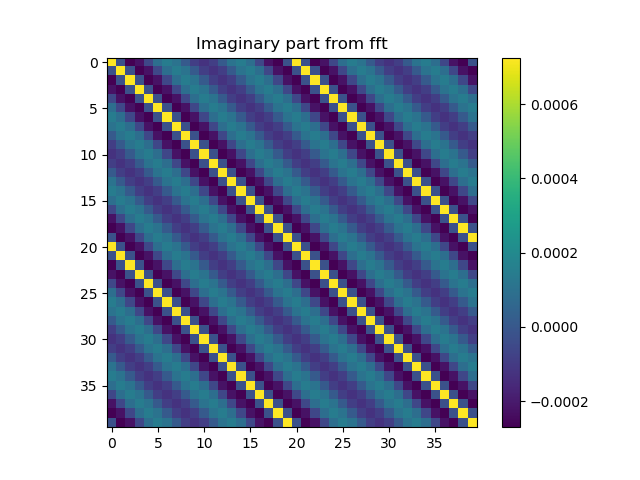

<IPython.core.display.Javascript object>


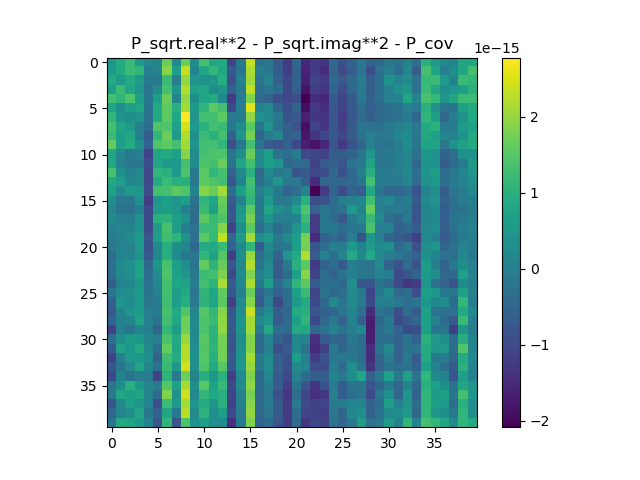

Text(0.5,1,'P_sqrt.real**2 - P_sqrt.imag**2 - P_cov')

In [13]:
plt.figure()
im = plt.imshow(P_sqrt.imag @ P_sqrt.imag)
plt.colorbar(im)
plt.title('Imaginary part from fft')

plt.figure()
im = plt.imshow((P_sqrt.real @ P_sqrt.real - P_sqrt.imag @ P_sqrt.imag) - P_cov)
plt.colorbar(im)
plt.title('P_sqrt.real**2 - P_sqrt.imag**2 - P_cov')

In [14]:
P_real = P_sqrt.real @ P_sqrt.real
P_imag = P_sqrt.imag @ P_sqrt.imag

In [15]:
eig_val = np.fft.fft(P_cov[0, :])
eig_vec = np.fft.fft(np.eye(dimension))
eig_vec_inv = sp.linalg.inv(eig_vec)

In [16]:
P_new = eig_vec @ np.diag(eig_val.real) @ eig_vec_inv

<IPython.core.display.Javascript object>


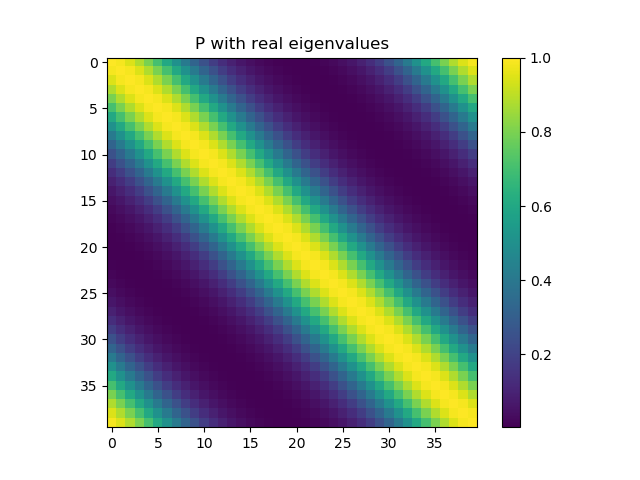

<IPython.core.display.Javascript object>


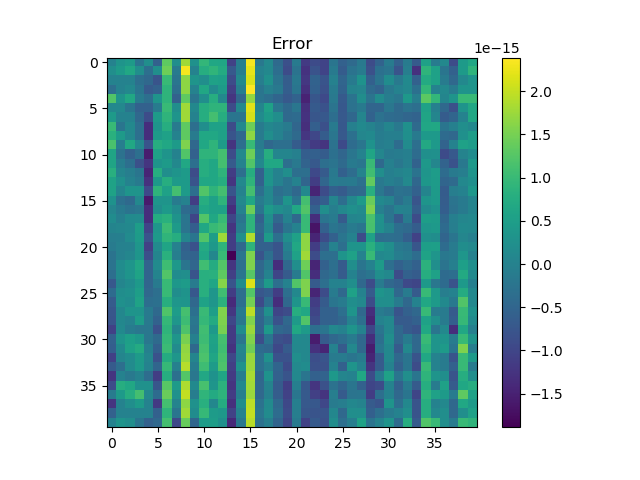

Text(0.5,1,'Error')

In [17]:
plt.figure()
im = plt.imshow(P_new.real)
plt.colorbar(im)
plt.title('P with real eigenvalues')

plt.figure()
im = plt.imshow(P_new.real - P_cov)
plt.colorbar(im)
plt.title('Error')

In [18]:
eig_val = np.fft.fft(P_new[0, :])
eig_vec = np.fft.fft(np.eye(dimension))
eig_vec_inv = sp.linalg.inv(eig_vec)

In [19]:
P_new = eig_vec @ np.diag(eig_val.real.clip(min=0)) @ eig_vec_inv

<IPython.core.display.Javascript object>


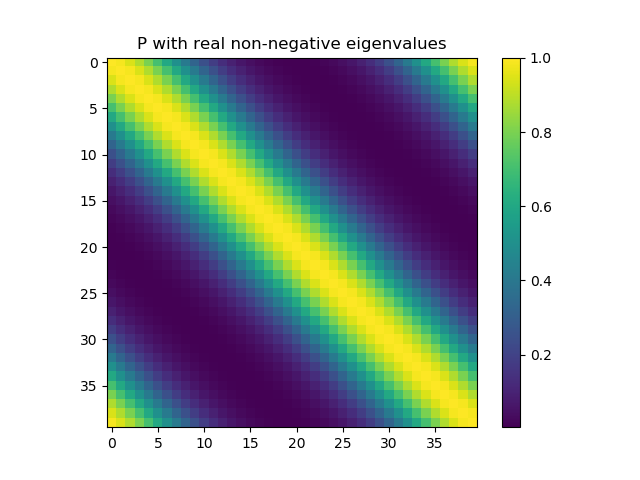

<IPython.core.display.Javascript object>


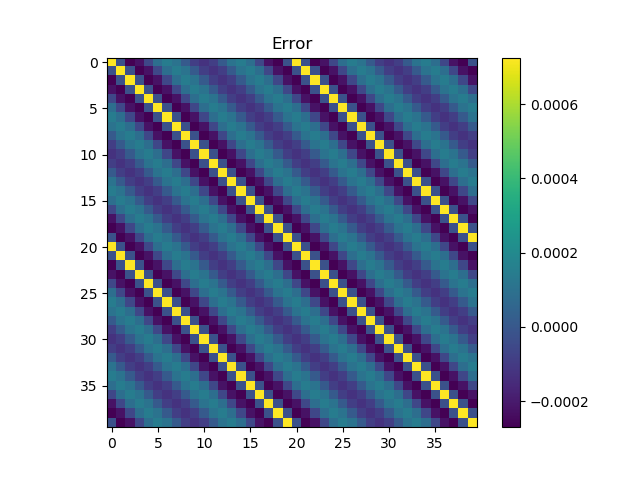

Text(0.5,1,'Error')

In [20]:
plt.figure()
im = plt.imshow(P_new.real)
plt.colorbar(im)
plt.title('P with real non-negative eigenvalues')

plt.figure()
im = plt.imshow(P_new.real - P_cov)
plt.colorbar(im)
plt.title('Error')

In [21]:
P_new = P_real - P_imag

In [22]:
eig_val = np.fft.fft(P_new[0, :])

In [23]:
P_hat = eig_vec @ np.diag(eig_val) @ eig_vec_inv

<IPython.core.display.Javascript object>


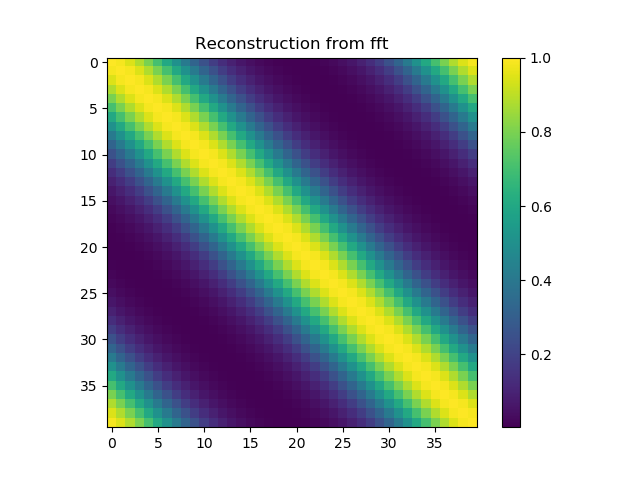

<IPython.core.display.Javascript object>


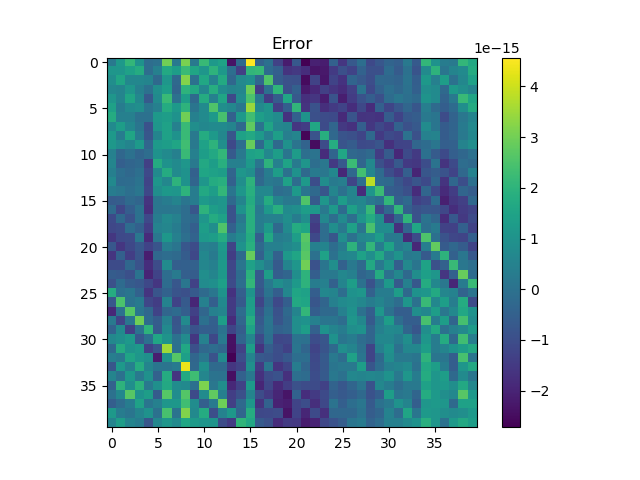

Text(0.5,1,'Error')

In [24]:
plt.figure()
im = plt.imshow(P_hat.real)
plt.colorbar(im)
plt.title('Reconstruction from fft')

plt.figure()
im = plt.imshow(P_hat.real - P_cov)
plt.colorbar(im)
plt.title('Error')

In [25]:
P_sqrt = eig_vec @ np.diag(np.sqrt(eig_val)) @ eig_vec_inv

<IPython.core.display.Javascript object>


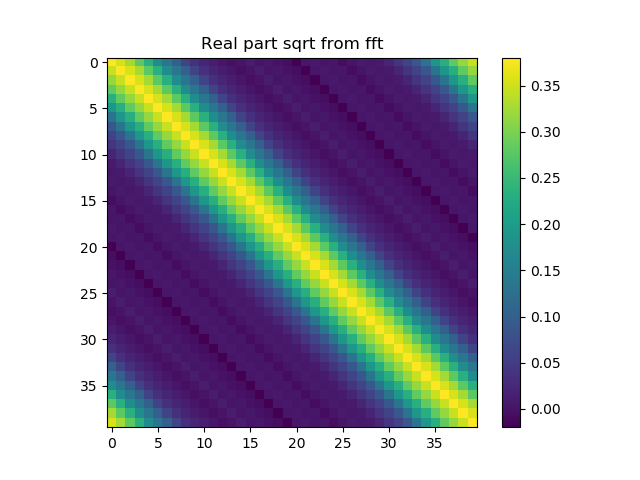

<IPython.core.display.Javascript object>


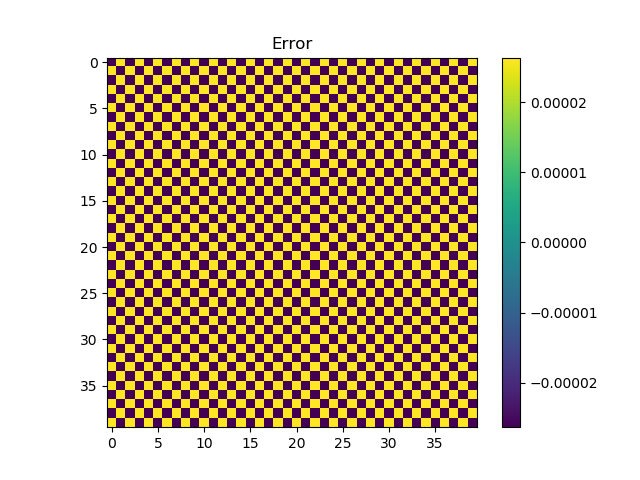

Text(0.5,1,'Error')

In [26]:
plt.figure()
im = plt.imshow(P_sqrt.real)
plt.colorbar(im)
plt.title('Real part sqrt from fft')

plt.figure()
im = plt.imshow(P_cov - (P_sqrt.real @ P_sqrt.real))
plt.colorbar(im)
plt.title('Error')

<IPython.core.display.Javascript object>


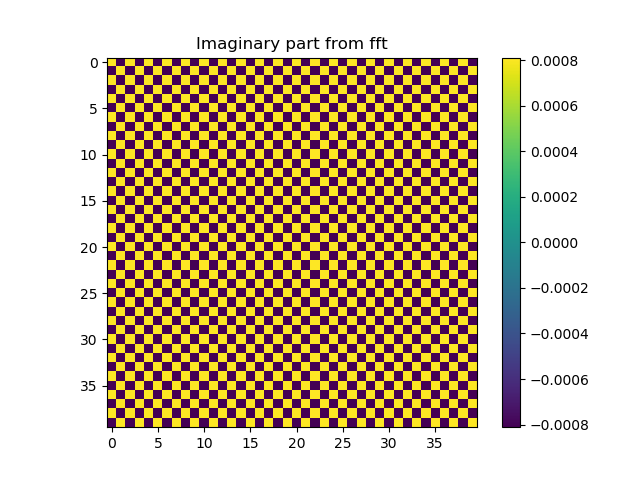

<IPython.core.display.Javascript object>


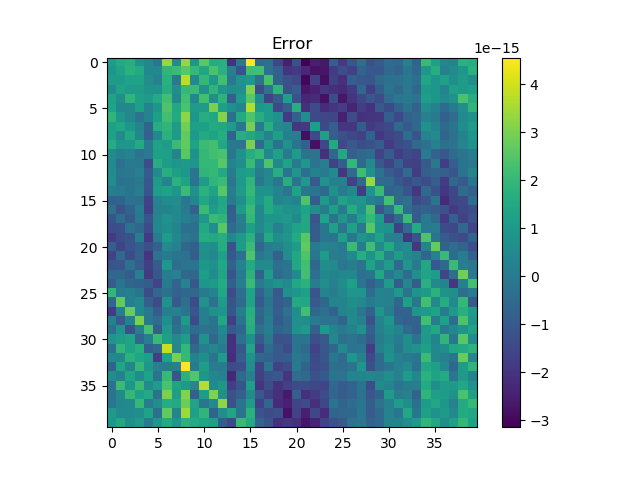

Text(0.5,1,'Error')

In [27]:
plt.figure()
im = plt.imshow(P_sqrt.imag)
plt.colorbar(im)
plt.title('Imaginary part from fft')

plt.figure()
im = plt.imshow((P_sqrt.real @ P_sqrt.real - P_sqrt.imag @ P_sqrt.imag) - P_cov)
plt.colorbar(im)
plt.title('Error')